In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Pandas custom options
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 100)

#Set seaborn plot theme
sns.set_style('darkgrid')

%matplotlib inline

In [2]:
data = pd.read_csv('HR_comma_sep.csv')

In [3]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


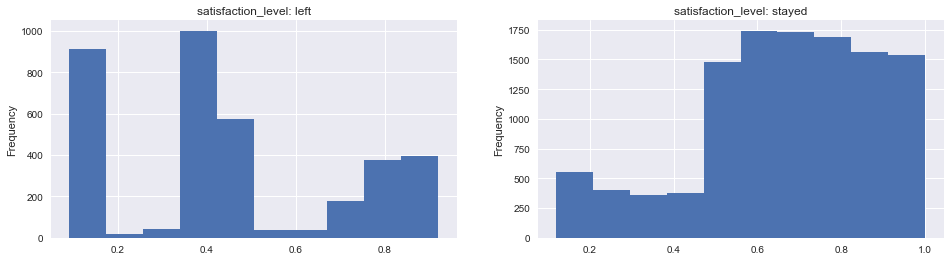

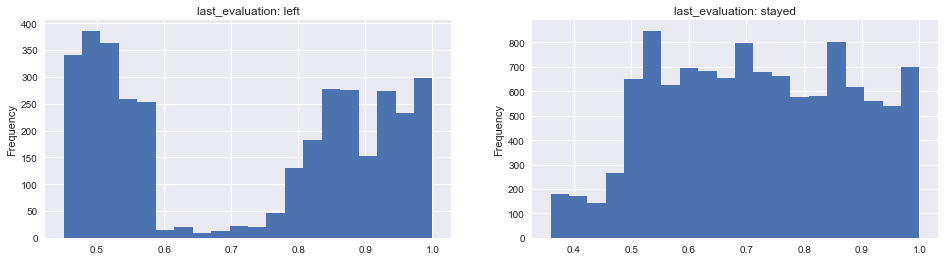

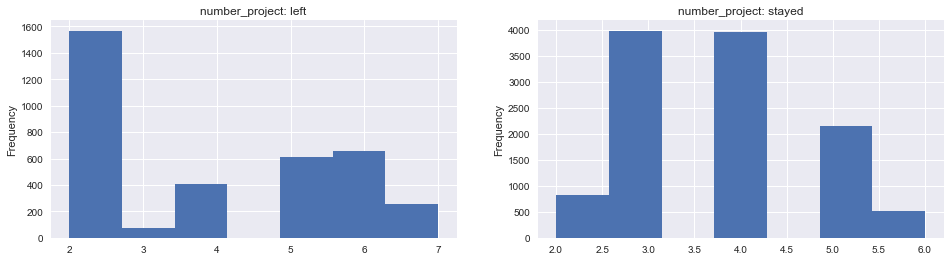

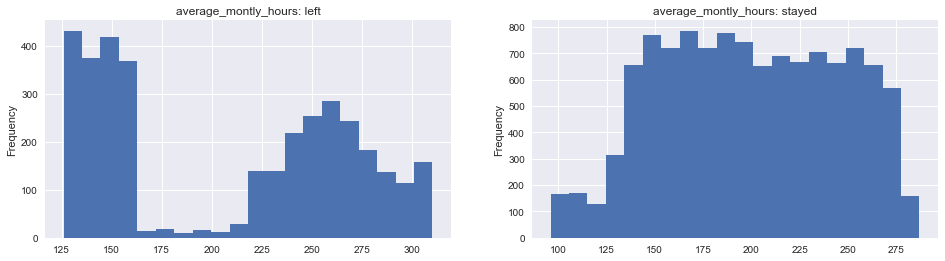

In [7]:
mask = data.left==1

def make_hist(col, bins):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
    data[mask][col].plot(kind='hist', bins=bins, title=col +': left', ax=axes[0])
    data[~mask][col].plot(kind='hist', bins=bins, title=col + ': stayed', ax=axes[1])
    plt.plot()

cols = [
    ('satisfaction_level', 10),
    ('last_evaluation', 20),
    ('number_project', 7),
    ('average_montly_hours', 20),
]

for col, bins in cols:
    make_hist(col, bins)

In [8]:
cat_cols = ['sales', 'salary']
non_cat_cols = [col for col in data.columns if col not in cols]

dummies = [pd.get_dummies(data[col], prefix=col) for col in cols]
cat_data = pd.concat(dummies, axis=1)
train_data = data[non_cat_cols].join(cat_data)

KeyError: ('satisfaction_level', 10)

In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [41]:
y_col = 'left'
x_col = [col for col in train_data.columns if col!=y_col]

y = train_data[y_col]
X = train_data[x_col]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
gbc = XGBClassifier()
cross_val_score(gbc, X, y, cv=5, n_jobs=-1, scoring='accuracy')

array([ 0.97734089,  0.97333333,  0.97366667,  0.97632544,  0.96298766])

In [ ]:
param_fix = {'learning_rate': 0.1, 'n_estimators': 1000, 'subsample': 0.8}
param_grid = {'max_depth': range(1, 10), 'min_child_weight': range(1, 6), 'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]}

gbc = XGBClassifier(**param_fix)
grid_search = GridSearchCV(gbc, param_grid, cv=3, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

print(grid_search.score(X_test, y_test))
print(grid_search.best_params_)

Fitting 3 folds for each of 225 candidates, totalling 675 fits
[CV] max_depth=1, min_child_weight=1, reg_alpha=1e-05 ................
[CV] max_depth=1, min_child_weight=1, reg_alpha=1e-05 ................
[CV] max_depth=1, min_child_weight=1, reg_alpha=1e-05 ................
[CV] max_depth=1, min_child_weight=1, reg_alpha=0.01 .................
[CV]  max_depth=1, min_child_weight=1, reg_alpha=0.01, score=0.964533, total=   3.2s
[CV] max_depth=1, min_child_weight=1, reg_alpha=0.01 .................
[CV]  max_depth=1, min_child_weight=1, reg_alpha=1e-05, score=0.964533, total=   3.2s
[CV] max_depth=1, min_child_weight=1, reg_alpha=0.01 .................
[CV]  max_depth=1, min_child_weight=1, reg_alpha=1e-05, score=0.970392, total=   3.2s
[CV]  max_depth=1, min_child_weight=1, reg_alpha=1e-05, score=0.962933, total=   3.2s
[CV] max_depth=1, min_child_weight=1, reg_alpha=0.1 ..................
[CV] max_depth=1, min_child_weight=1, reg_alpha=0.1 ..................
[CV]  max_depth=1, min_chi

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   20.3s


[CV]  max_depth=1, min_child_weight=2, reg_alpha=1, score=0.961333, total=   3.4s
[CV] max_depth=1, min_child_weight=2, reg_alpha=100 ..................
[CV]  max_depth=1, min_child_weight=2, reg_alpha=1, score=0.964533, total=   3.5s
[CV] max_depth=1, min_child_weight=2, reg_alpha=100 ..................
[CV]  max_depth=1, min_child_weight=2, reg_alpha=100, score=0.888000, total=   3.1s
[CV] max_depth=1, min_child_weight=3, reg_alpha=1e-05 ................
[CV]  max_depth=1, min_child_weight=2, reg_alpha=1, score=0.968258, total=   3.4s
[CV] max_depth=1, min_child_weight=3, reg_alpha=1e-05 ................
[CV]  max_depth=1, min_child_weight=2, reg_alpha=100, score=0.892000, total=   3.0s
[CV]  max_depth=1, min_child_weight=2, reg_alpha=100, score=0.894105, total=   2.9s
[CV] max_depth=1, min_child_weight=3, reg_alpha=1e-05 ................
[CV] max_depth=1, min_child_weight=3, reg_alpha=0.01 .................
[CV]  max_depth=1, min_child_weight=3, reg_alpha=1e-05, score=0.962400, tota

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.9min


[CV]  max_depth=2, min_child_weight=4, reg_alpha=1e-05, score=0.975200, total=   4.9s
[CV] max_depth=2, min_child_weight=4, reg_alpha=0.01 .................
[CV]  max_depth=2, min_child_weight=4, reg_alpha=1e-05, score=0.973333, total=   4.9s
[CV] max_depth=2, min_child_weight=4, reg_alpha=0.01 .................
[CV]  max_depth=2, min_child_weight=4, reg_alpha=1e-05, score=0.975460, total=   4.8s
[CV] max_depth=2, min_child_weight=4, reg_alpha=0.1 ..................
[CV]  max_depth=2, min_child_weight=4, reg_alpha=0.01, score=0.974667, total=   4.9s
[CV] max_depth=2, min_child_weight=4, reg_alpha=0.1 ..................
[CV]  max_depth=2, min_child_weight=4, reg_alpha=0.01, score=0.973333, total=   4.9s
[CV] max_depth=2, min_child_weight=4, reg_alpha=0.1 ..................
[CV]  max_depth=2, min_child_weight=4, reg_alpha=0.1, score=0.976000, total=   4.8s
[CV] max_depth=2, min_child_weight=4, reg_alpha=1 ....................
[CV]  max_depth=2, min_child_weight=4, reg_alpha=0.01, score=0

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  6.8min


[CV]  max_depth=4, min_child_weight=4, reg_alpha=1, score=0.982133, total=   9.4s
[CV] max_depth=4, min_child_weight=4, reg_alpha=100 ..................
[CV]  max_depth=4, min_child_weight=4, reg_alpha=1, score=0.979995, total=   9.4s
[CV] max_depth=4, min_child_weight=5, reg_alpha=1e-05 ................
[CV]  max_depth=4, min_child_weight=4, reg_alpha=100, score=0.959733, total=   3.5s
[CV] max_depth=4, min_child_weight=5, reg_alpha=1e-05 ................
[CV]  max_depth=4, min_child_weight=4, reg_alpha=100, score=0.960000, total=   3.5s
[CV] max_depth=4, min_child_weight=5, reg_alpha=1e-05 ................
[CV]  max_depth=4, min_child_weight=4, reg_alpha=100, score=0.958922, total=   3.3s
[CV] max_depth=4, min_child_weight=5, reg_alpha=0.01 .................
[CV]  max_depth=4, min_child_weight=5, reg_alpha=1e-05, score=0.983200, total=   9.2s
[CV] max_depth=4, min_child_weight=5, reg_alpha=0.01 .................
[CV]  max_depth=4, min_child_weight=5, reg_alpha=1e-05, score=0.981867, 

[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 17.7min


[CV]  max_depth=7, min_child_weight=4, reg_alpha=1, score=0.984533, total=  13.6s
[CV] max_depth=7, min_child_weight=4, reg_alpha=100 ..................
[CV]  max_depth=7, min_child_weight=4, reg_alpha=1, score=0.983733, total=  13.4s
[CV] max_depth=7, min_child_weight=4, reg_alpha=100 ..................
[CV]  max_depth=7, min_child_weight=4, reg_alpha=1, score=0.981595, total=  13.6s
[CV] max_depth=7, min_child_weight=5, reg_alpha=1e-05 ................
[CV]  max_depth=7, min_child_weight=4, reg_alpha=100, score=0.967200, total=   3.4s
[CV] max_depth=7, min_child_weight=5, reg_alpha=1e-05 ................
[CV]  max_depth=7, min_child_weight=4, reg_alpha=100, score=0.965333, total=   3.3s
[CV] max_depth=7, min_child_weight=5, reg_alpha=1e-05 ................
[CV]  max_depth=7, min_child_weight=4, reg_alpha=100, score=0.964791, total=   3.3s
[CV] max_depth=7, min_child_weight=5, reg_alpha=0.01 .................
[CV]  max_depth=7, min_child_weight=5, reg_alpha=1e-05, score=0.985067, tota